In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
#!pip install pandas
import pandas
from pcigale.sed import SED
from pcigale.sed import utils
from pcigale.sed_modules import get_module
import scipy

In [2]:
data=Table.read('results.fits', format = 'fits')
data=data.to_pandas()
mass=np.array(data.loc[:,"best.stellar.m_star"])
sfr=np.array(data.loc[:,"bayes.sfh.sfr10Myrs"])
sfr_err=np.array(data.loc[:,"bayes.sfh.sfr10Myrs_err"])

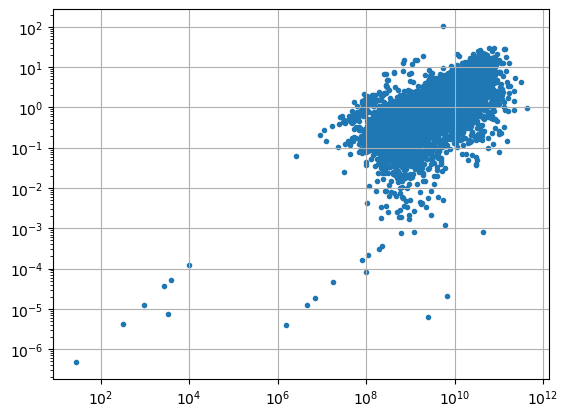

In [3]:
plt.scatter(mass, sfr, marker='.')
plt.loglog()
#plt.xlim(1e7, 1e12)
#plt.ylim(1e-3, 1e3)
plt.grid()

In [4]:
def f(x, m, q): 
    return (m*x)+q

error = sfr_err/sfr
par,cov= scipy.optimize.curve_fit(f, np.log10(mass), np.log10(sfr), sigma=error)
print(par)

[ 0.46561551 -4.2266593 ]


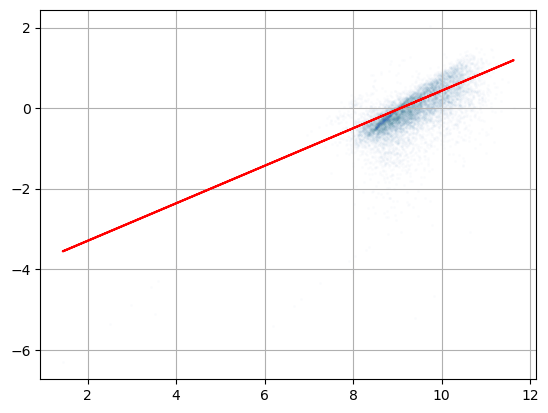

In [5]:
plt.scatter(np.log10(mass), np.log10(sfr), marker='.', s=7, alpha=0.01)
plt.plot(np.log10(mass), f(np.log10(mass), par[0], par[1]), color='red')
#plt.xlim(7,12)
#plt.ylim(-3,3)
plt.grid()

#plot not good: we want to cut the passive galaxies

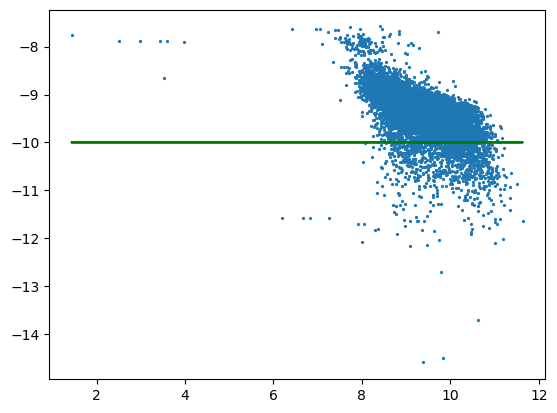

In [25]:
MASS = np.log10(mass)
SFR = np.log10(sfr)
specific_sfr = SFR - MASS
plt.scatter(MASS, specific_sfr, marker='.', s=7)

def const(x, a):
    return 0*x+a
    
plt.plot(MASS, const(MASS, -10), color = 'green')

In [26]:
mask = np.ma.masked_less(specific_sfr< -10, specific_sfr)
MASS_filtered = np.ma.masked_array(MASS, mask).compressed()
specific_sfr_filtered = np.ma.masked_array(specific_sfr, mask).compressed()
print("Vettore x filtrato:", MASS_filtered)
print("Vettore y filtrato:", specific_sfr_filtered)

Vettore x filtrato: [9.79277848 9.32196389 8.71952949 ... 8.85179179 9.93894248 9.31214766]
Vettore y filtrato: [-9.27553332 -9.47874652 -8.92573582 ... -9.62506439 -9.56635149
 -9.6421287 ]


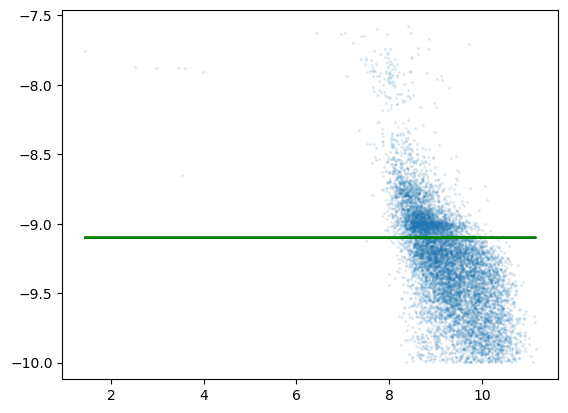

In [27]:
plt.scatter(MASS_filtered, specific_sfr_filtered, marker='.', s=7, alpha=0.1)
plt.plot(MASS_filtered, const(MASS_filtered, -9.1), color = 'green')

In [28]:
SFR_new = specific_sfr_filtered + MASS_filtered

In [40]:
pp = np.polyfit(MASS_filtered, SFR_new, 1)
print(pp)

[ 0.62869277 -5.83870709]


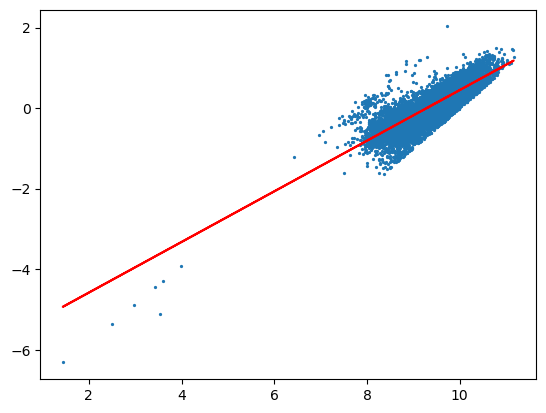

In [41]:
plt.scatter(MASS_filtered, SFR_new, marker='.', s=7)
plt.plot(MASS_filtered, np.polyval(pp, MASS_filtered), color='red')

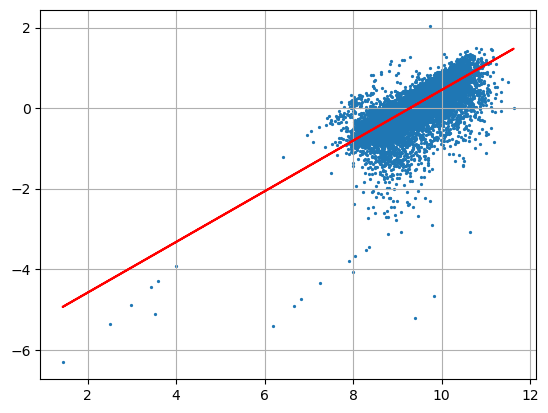

In [44]:
plt.scatter(np.log10(mass), np.log10(sfr), marker='.', s=7)
plt.plot(np.log10(mass), np.polyval(pp, np.log10(mass)), color='red')
#plt.xlim(7,12)
#plt.ylim(-3,3)
plt.grid()